In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df=df.rename(columns={
    'Annual Income (k$)':'annual_income',
    'Spending Score (1-100)':'spend_score'
})
    

In [36]:
X=df[['annual_income','spend_score']]
X.head()

,annual_income,spend_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [39]:
X=df[['annual_income','spend_score']]
X.head()

,annual_income,spend_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [40]:
scaler=StandardScaler()
xscaled=scaler.fit_transform(X)

In [41]:
km=KMeans(n_clusters= 4)  # kati ota group banaune ta is given by n_clusters=4 (4 ota vayo)
km.fit(xscaled)

KMeans(n_clusters=4)

In [42]:
df['labels']=km.labels_
df.head()

,CustomerID,Gender,Age,annual_income,spend_score,labels
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [43]:
df_cluster0=df[df['labels']==0]

In [44]:
count=df_cluster0['Gender'].value_counts()
count

Gender
Female    21
Male      18
Name: count, dtype: int64

In [45]:
df_cluster0['Age'].describe()

count    39.000000
mean     32.692308
std       3.728650
min      27.000000
25%      30.000000
50%      32.000000
75%      35.500000
max      40.000000
Name: Age, dtype: float64

In [46]:
df_cluster1=df[df['labels']==1]

In [47]:
count=df_cluster1['Gender'].value_counts()
count

Gender
Female    59
Male      41
Name: count, dtype: int64

In [48]:
df_cluster1['Age'].describe()

count    100.000000
mean      39.200000
std       16.560266
min       18.000000
25%       23.750000
50%       35.000000
75%       50.250000
max       70.000000
Name: Age, dtype: float64

#  pipeline and PCA (principle component Analysis)

In [33]:
# if one task and other task is 
Pipelining generally refers to a technique used in 
 machine learning where multiple stages of a process
are connected in a sequence, with the output of one stage serving as the input to the next.

SyntaxError: invalid syntax (1545058512.py, line 2)

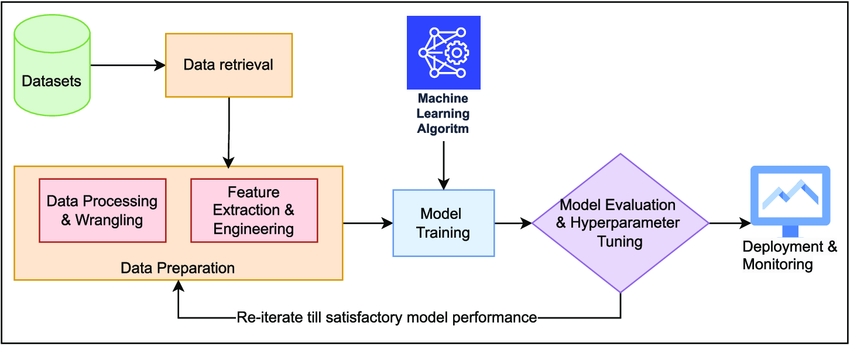

In [49]:
from sklearn.pipeline import Pipeline

In [50]:
pipeline_model=Pipeline([
    ('scaler',StandardScaler()),
    ('model',KMeans(n_clusters=4))
])

In [51]:
pipeline_model.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('model', KMeans(n_clusters=4))])

# this is generally a like a function but in the actual sense it is not a function
pmodel=Pipeline({
    ('scaler',StandardScaler()),
    ('model',KNeighborsClassifier())
})

 # PCA
 - in pca we need the scaling of the data 
- to reuse the dimension of data
- data:large number of columns
- PCA (Principal Component Analysis) is a technique used to reduce the number of features (dimensions) in your dataset while keeping as much important information as possible.

 # Why PCA?
 Imagine you have a dataset with lots of columns (features) — many of them may be:

-Redundant (similar to each other)

-Not contributing much

-Making the model slow or less accurate

PCA helps you compress the data into fewer dimensions without losing much useful information.

# Real-Life Analogy
Think of PCA like taking a high-resolution 3D object (e.g., a ball) and projecting it onto a 2D sheet — you get the main shape or structure, but in fewer dimensions.

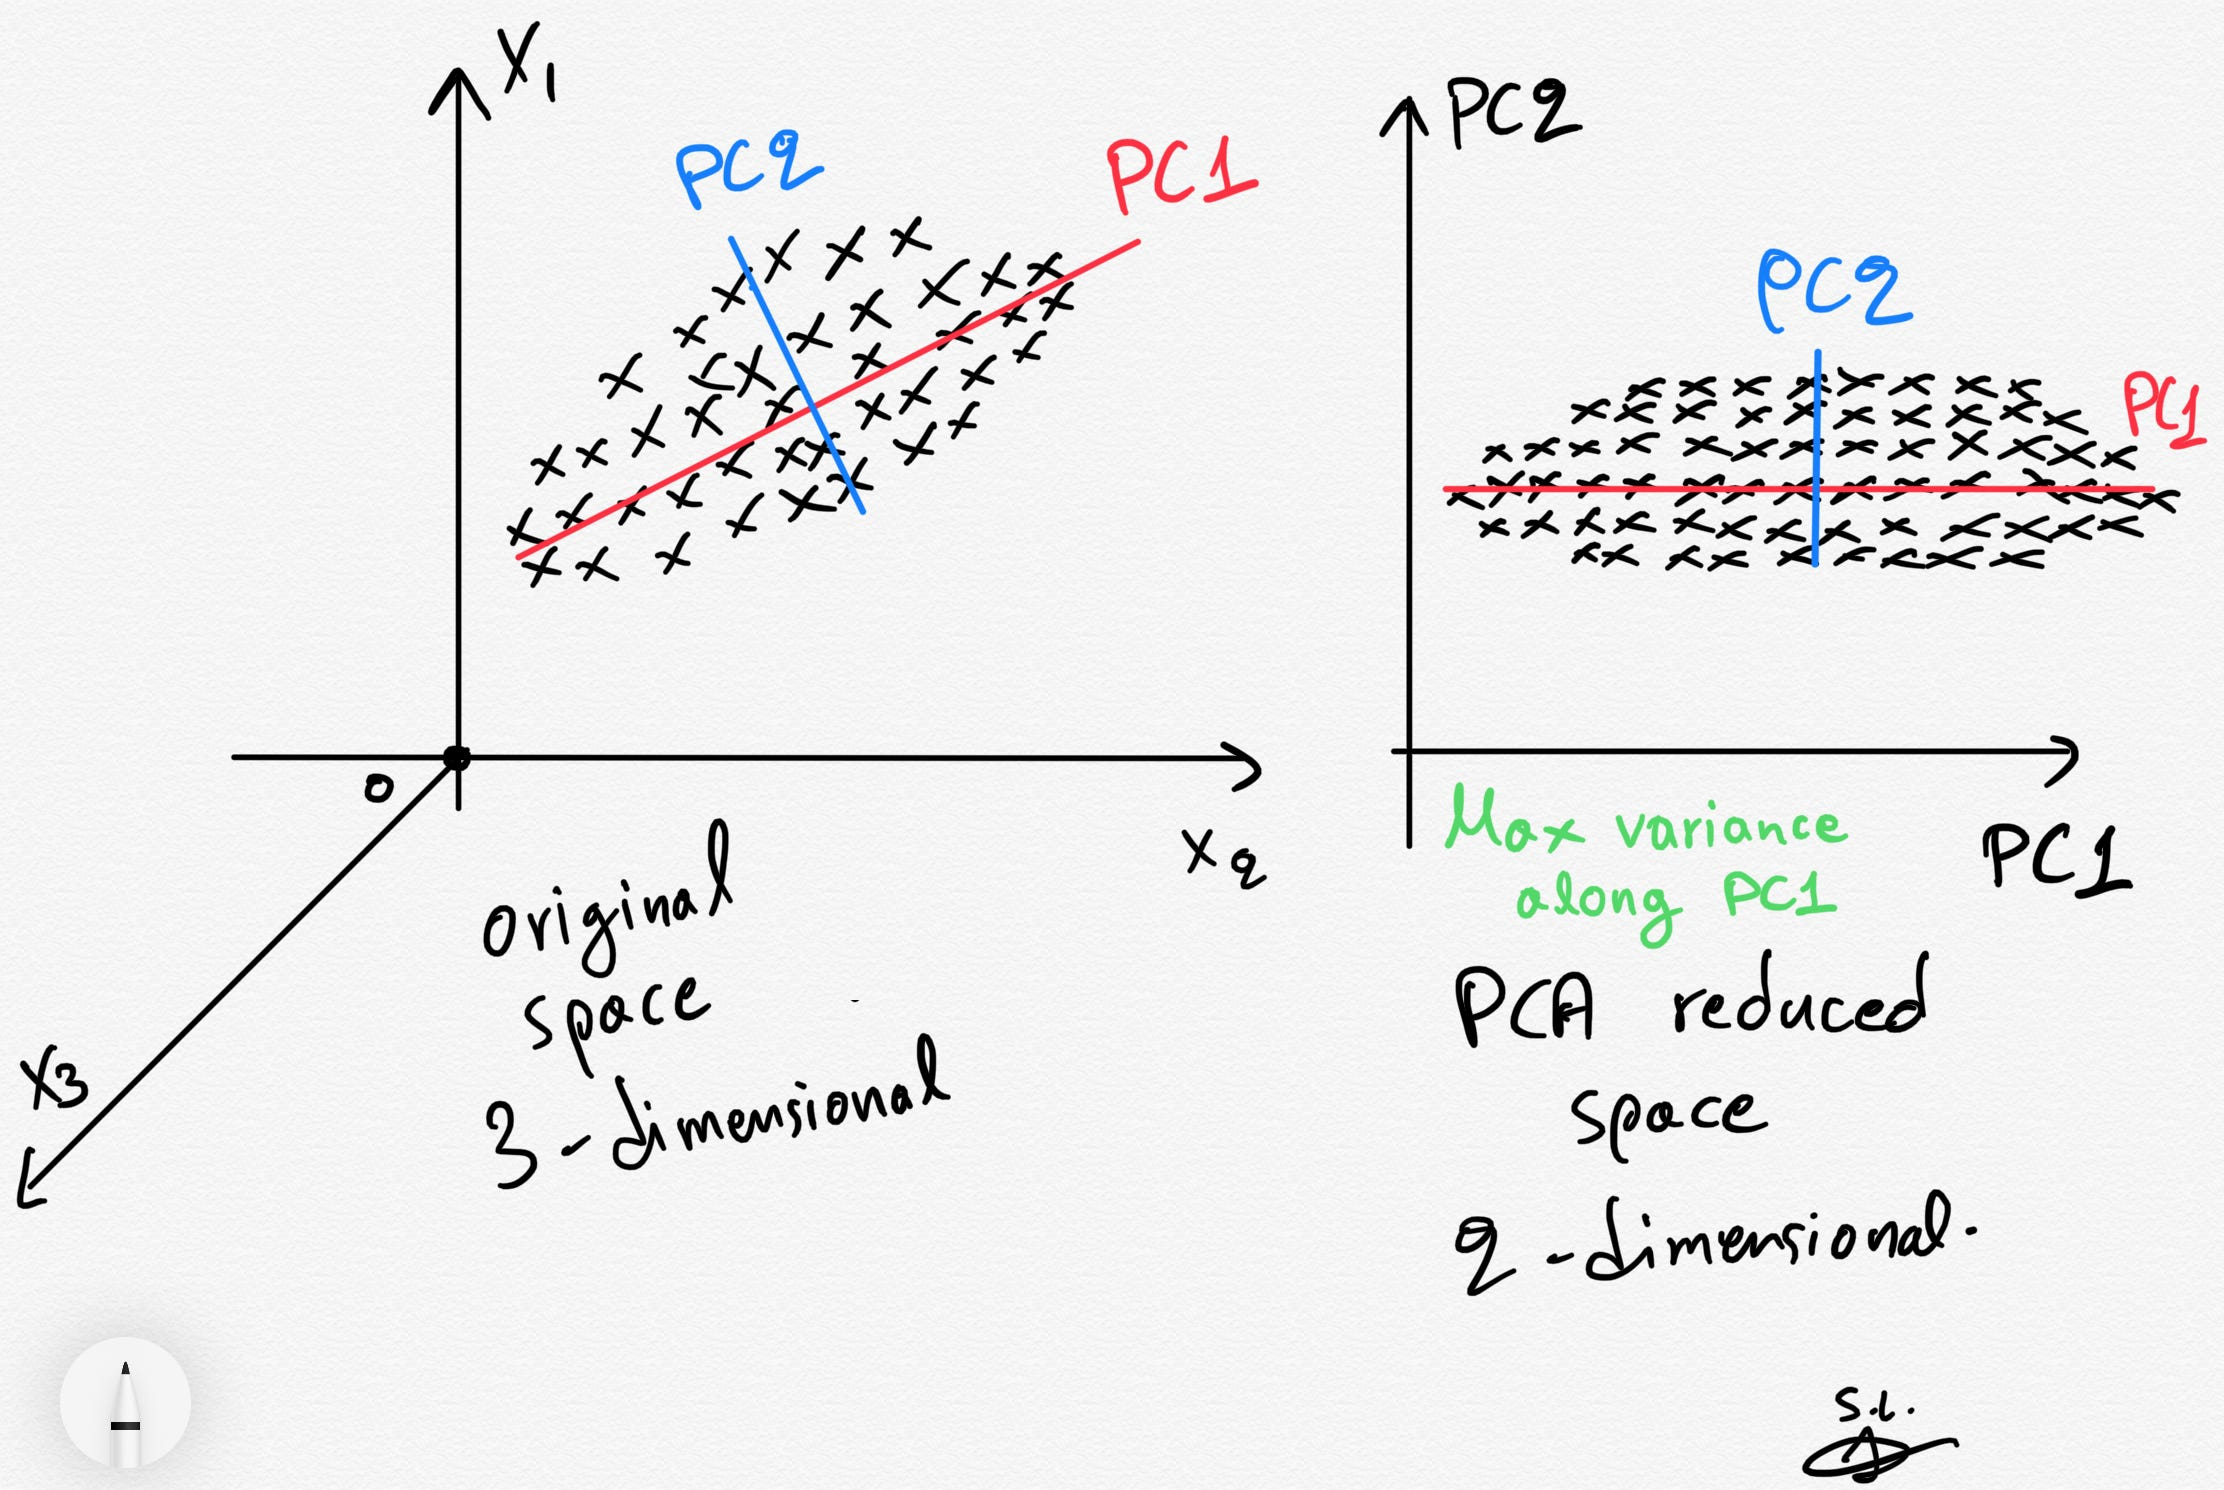

In [53]:
data=pd.read_csv('wine.data.csv')
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# here the dimension of the wine data is very high means the number of colums 
- we can make it more managable by only using the essential features 
- naya column haru banaidinxa
- 

In [54]:
data.shape

(178, 14)

In [55]:
data['Class'].unique()

array([1, 2, 3])

In [57]:
df=data.drop('Class',axis=1)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [56]:
from sklearn.decomposition import PCA

In [58]:
pca=PCA(n_components=5)   # 13 0ta columns bata 5 ota new combined columns  banaunxa 
dfn=pca.fit_transform(df)

In [62]:
dfnew=pd.DataFrame(dfn)
dfnew.head()

,0,1,2,3,4
0,318.562979,21.492131,-3.130735,0.250114,-0.677078
1,303.097420,-5.364718,-6.822835,0.864035,0.486096
2,438.061133,-6.537309,1.113223,-0.912411,-0.380651
3,733.240139,0.192729,0.917257,0.541251,-0.858662
4,-11.571428,18.489995,0.554422,-1.360896,-0.276442


# eigen vector and eigen value 
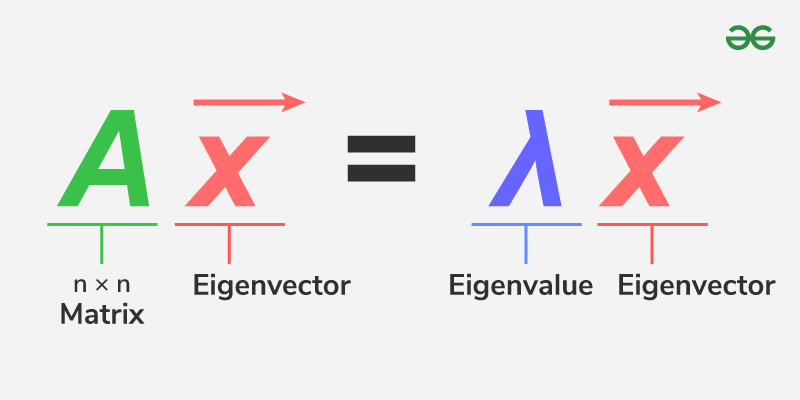

In [ ]:
  two method to choose the number of columns in the pca 
-kaiser rule
-scree plot

In [63]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [65]:
pca= PCA()
dfn=pca.fit_transform(df)

In [66]:
dfnew=pd.DataFrame(dfn)
dfnew

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,318.562979,21.492131,-3.130735,0.250114,-0.677078,0.568081,0.619642,0.199555,0.701280,-0.095008,0.088734,-0.038548,0.080264
1,303.097420,-5.364718,-6.822835,0.864035,0.486096,0.014340,-0.108865,-0.604714,0.286717,-0.045782,0.039778,-0.057192,0.013593
2,438.061133,-6.537309,1.113223,-0.912411,-0.380651,0.672404,-0.785819,0.500886,0.024547,-0.208960,0.237770,-0.048798,-0.035408
3,733.240139,0.192729,0.917257,0.541251,-0.858662,0.599122,-0.018770,-0.190428,0.054277,0.531684,-0.096044,-0.166353,0.016344
4,-11.571428,18.489995,0.554422,-1.360896,-0.276442,0.768884,0.309976,-0.119091,-0.195843,0.061771,0.316466,-0.007118,0.015278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,2.474707,3.155920,2.348927,1.439001,0.026425,-0.043705,0.040167,0.087377,0.016509,0.098355,0.027251
174,3.131605,2.335191,4.309931,1.562181,1.168003,0.128679,-0.003859,0.303185,-0.159759,0.159510,-0.048916,0.012626,-0.042645
175,88.458074,18.776285,2.237577,4.820708,1.057336,0.215000,-0.648489,-0.068966,0.273675,-0.045336,-0.223049,0.096049,0.036175
176,93.456242,18.670819,1.788392,3.709352,0.276956,-1.009229,-0.414948,0.145647,0.254468,0.059211,-0.030408,-0.052089,0.132759


In [ ]:
then our task is to find the optimal number of the columns 
where the most of the information is have 


In [ ]:
# kaiser rule: see the eigin value , and select those who have eigin values more than 1 

In [68]:
eiginvalues=pca.explained_variance_
eiginvalues

array([9.92017895e+04, 1.72535266e+02, 9.43811370e+00, 4.99117861e+00,
       1.22884523e+00, 8.41063869e-01, 2.78973523e-01, 1.51381266e-01,
       1.12096765e-01, 7.17026032e-02, 3.75759789e-02, 2.10723661e-02,
       8.20370314e-03])

In [69]:
pca.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [ ]:
#scree plot 
- this is generally a plot 


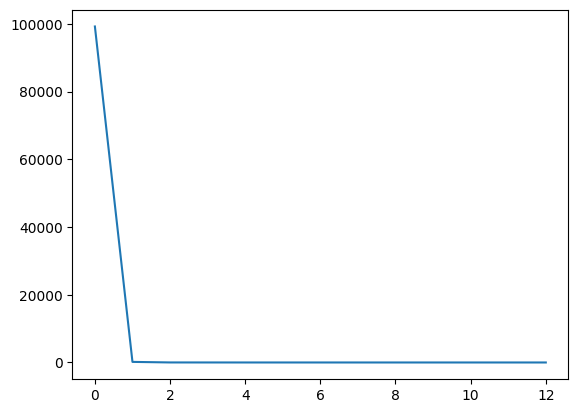

In [70]:
plt.plot(range(13),eiginvalues)
plt.show()
